<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практикум**: создаем свой первый датасет

**Что нас ждет?**

Пробежимся по этапам создания своего датасета

0. Создание структуры датасета
1. Веб-скрейпинг с `BeautifulSoup` и `Requests`
2. Создание словарей Python
3. Сохраняем всё в файл JSON
4. Пушим на GitHub

## Поехали

## 1. Выбери тему

Какая тема тебе интересна?

В домашнем задании можешь придумать свою. А пока поработаем с топом фильмов c IMDb

**Задание 1:** сформулируй тему. На какую тему ты хочешь собрать данные?

Запиши ответ здесь: ...

## 2. Подумаем о структурах

Как будет выглядеть твой датасет?

Вспомни датасеты, которые мы рассматривали на предыдущих занятиях.

Какие классы будет включать твой датасет, что он демонстрирует, какие цели выполняет? Подходит ли он для машинного обучения или для анализа данных?

Нарисуй структуру твоего датасета.

---

Рекомендации:

1. Используй графический редактор, например, drawio
2. Воспользуйся ChatGPT

---

А пока вернемся к IMDb. Как должна выглядеть структура данных для иллюстрации кинематографической базы? Например, вот так:

    > Название
    > Год выпуска
    > Жанр
    > Рейтинг
    > Количество отзывов

Набросаем структуру в drawio:

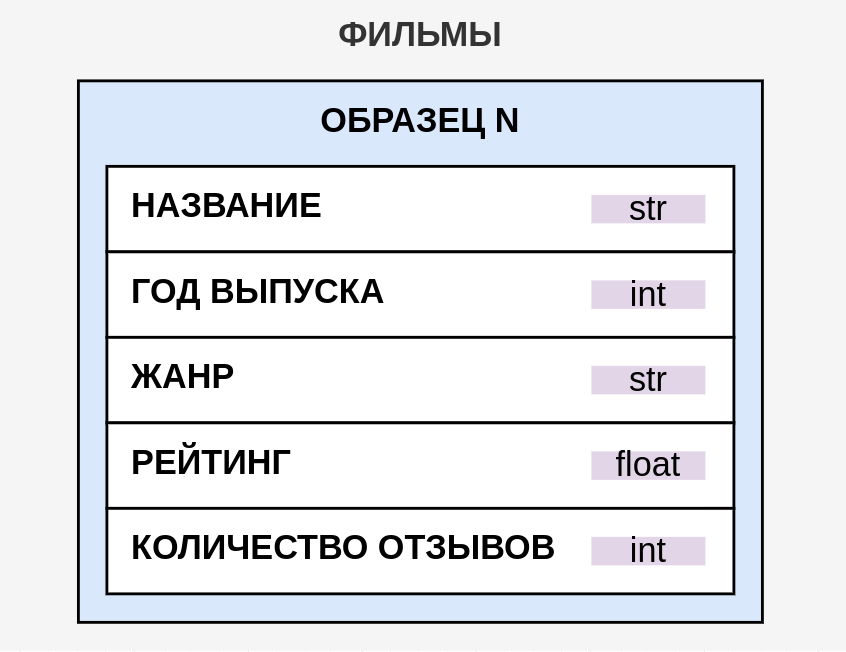

Визуализация поможет нам набросать структуру данных:

```
{
    "movies": [
        {
            "title": "Movie Title",
            "year": "2023",
            "genre": "Drama",
            "rating": "8.5",
            "reviews": "12345"
        },
        ...
    ]
}
```


**Задание 2:** опишите и создайте иллюстрацию для структуры вашего датасета

Решение: ...

## 3. Источники

Откуда мы будем брать информацию?

Источник информации определяет инструменты, которые понадобятся нам для извлечения информации. Это могут быть, как знакомые нам `Requests` и `BeautifulSoup`, так и API (например, [VK API](https://dev.vk.com/ru/method))

Воспользуемся известными нам инструментами, чтобы соскрейпить страницу [Top 250 Movies](https://www.imdb.com/chart/top) с IMDb

**Задание 3:** выпишите источники данных. Какие иструменты вам понадобятся для извлечения информации?

Ответ: ...

## 4. Скрейпинг

Пройдемся по этапам скрейпинга данных с `Requests` и `Beautiful Soup`

**Задание 4.1:** импортируйте библиотеки `Requests` и `Beautiful Soup`

In [2]:
### ваш код здесь ###

**Задание 4.2:** допишите код для парсинга страницы `https://www.imdb.com/chart/top`

In [ ]:
URL = ### ваш код здесь: введите нужный URL ###

In [26]:
r = ### ваш код здесь: сделайте HTTP-запрос с помощью метода get из библиотеки requests ###

### ваш код здесь: выведите на экран HTTP-ответ ###

<Response [403]>


Что означает ответ 403?

Упс! На сайте IMDb стоит защита от скрепинга, нам запретили доступ :(

Обойдем? :)

Для этого настроим поддельный User Agent. Это строка, которая отправляется веб-клиентами c каждым HTTP-запросом для идентификации себя на веб-сервере

Небраузерные веб-клиенты имеют уникальные User Agent (это мы с вами прямо сейчас, мы ведь пишем код, а не используем браузер для запросов к веб-страницам). Вот как выглядит User Agent в Python Requests:

`python-requests/2.26.0`

А это User Agent для веб-браузера:

`Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, как Gecko) Chrome/109.0.0.0 Safari/537.36`

In [28]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}   # имитируем поведение пользователя из браузера, задаем User Agent

r = requests.get(url=URL, headers=headers)  # мы добавили еще один аргумент, headers

### ваш код здесь: выведите на экран HTTP-ответ ###

<Response [200]>

In [ ]:
soup = ### ваш код здесь: используйте BeautifulSoup, html.parser для создания объекта для парсинга страниц ###

Зайдите на страницу `https://www.imdb.com/chart/top/` и откройте код страницы (`Ctrl + U` или `Cmd + U` в вашем браузере). В открывшемся окне с помощью поиска по странице попробуйте найти название любого фильма из топа, например `The Godfather`

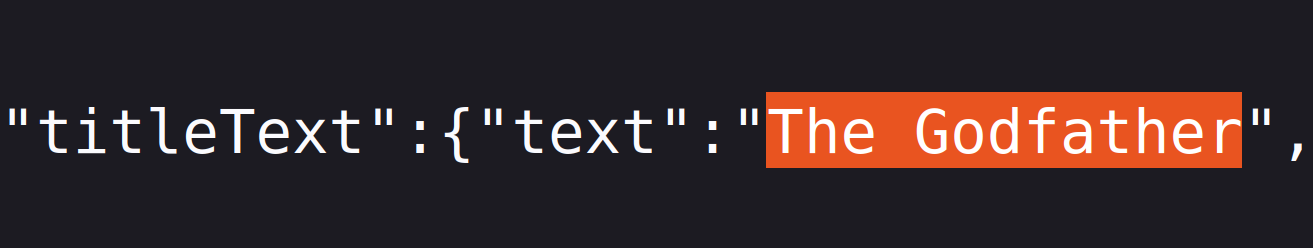

Кажется, эта структура отличается от привычного HTML... и похожа на питоновский словарь!

Разгадка в том, что это скрипт, который нужно парсить особым способом.

In [52]:
# мы производим поиск по скриптам, обращаясь к структуре json
# индексируем [0] просто потому, что у нас будет всего 1 результат поиска (так устроена страница топ-250 на IMDb)
movie_items = soup.find_all('script', type='application/ld+json')[0]

### ваш код здесь: выведите на экран результат парсинга, посмотрите на структуру данных ###

<script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/title/tt0111161/","name":"The Shawshank Redemption","description":"A Maine banker convicted of the murder of his wife and her lover in 1947 gradually forms a friendship over a quarter century with a hardened convict, while maintaining his innocence and trying to remain hopeful through simple comp...","image":"https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_.jpg","aggregateRating":{"@type":"AggregateRating","bestRating":10,"worstRating":1,"ratingValue":9.3,"ratingCount":2924703},"contentRating":"R","genre":"Drama","duration":"PT2H22M"}},{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/title/tt0068646/","name":"The Godfather","description":"Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son, Michael. Howeve

Этот формат, похожий на питоновский словарь, и есть JSON. Давайте импортируем библиотеку для работы с ним

In [50]:
import json

Пока что все данные хранятся в формате BeautifulSoup

Преобразуем их к виду JSON для удобства!

In [53]:
movie_data = json.loads(movie_items.string)

Что это дает? Сейчас увидим

In [54]:
from pprint import pprint

pprint(movie_data)

{'@context': 'https://schema.org',
 '@type': 'ItemList',
 'description': 'As rated by regular IMDb voters.',
 'itemListElement': [{'@type': 'ListItem',
                      'item': {'@type': 'Movie',
                               'aggregateRating': {'@type': 'AggregateRating',
                                                   'bestRating': 10,
                                                   'ratingCount': 2924703,
                                                   'ratingValue': 9.3,
                                                   'worstRating': 1},
                               'contentRating': 'R',
                               'description': 'A Maine banker convicted of the '
                                              'murder of his wife and her '
                                              'lover in 1947 gradually forms a '
                                              'friendship over a quarter '
                                              'century with a hardene

Теперь все можно прочитать и спарсить нужные данные!

Принцип работы - питоновский словарь.

In [56]:
### ваш код здесь: c помощью метода keys выведите все ключи словаря movie_data ###

dict_keys(['@type', 'itemListElement', '@context', 'name', 'description'])

Нас интересует ключ `itemListElement`. В нем хранятся все данные о фильмах из топа. Сохраним значения по ключу `itemListElement` в новую переменную

In [85]:
movies = ### ваш код здесь: запишите сюда информацию из movie_data по ключу itemListElement ###

In [60]:
### ваш код здесь: выведите тип переменной movies ###

list

Итак, наши фильмы записаны в список. Значит, мы можем итеративно извлекать информацию по каждому фильму! Что записано в каждом элементе, описывающем фильм?

In [72]:
### ваш код здесь: выведите информацию по любому элементу из переменной movies с помощью индексов ###

{'@type': 'ListItem',
 'item': {'@type': 'Movie',
  'url': 'https://www.imdb.com/title/tt0068646/',
  'name': 'The Godfather',
  'description': 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son, Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.',
  'image': 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_.jpg',
  'aggregateRating': {'@type': 'AggregateRating',
   'bestRating': 10,
   'worstRating': 1,
   'ratingValue': 9.2,
   'ratingCount': 2038280},
  'contentRating': 'R',
  'genre': 'Crime, Drama',
  'duration': 'PT2H55M'}}

Вернемся к нашей структуре
```
{
    "movies": [
        {
            "title": "Movie Title",
            "year": "2023",
            "genre": "Drama",
            "rating": "8.5",
            "reviews": "12345"
        },
        ...
    ]
}
```
Потренируемся на одном фильме: соберем для него всю необходимую информацию.

In [83]:
### ваш код здесь: создайте словарь с информацией title, genre, rating, description по любому элементу списка movies ###

{'title': 'The Godfather',
 'genre': 'Crime, Drama',
 'rating': 9.2,
 'description': 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son, Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.'}

Проделаем эту операцию для всех элементов.

In [104]:
dataset = ### ваш код здесь: создаем пустой список-хранилище ###

### ваш код здесь: для каждого элемента списка movies: ###
  ### ваш код здесь: соберите информацию для каждого фильма ###
  ### подсказка 1: желательно сохранить текущий movie['item'] во временную переменную, и уже работать с ним ###
  ### внимание! не во всех элементах списках movie есть ключ item; добавьте условие с if для проверки наличия такого ключа! ###
  ### подсказка 2: есть два способа извлечения значений по ключам:
  ###                                                             - movie['item']['name']
  ###                                                             - movie['item'].get('name')
  ### можно расширить список элементов, из которых вы создадите датасет, изучайте структуру данных!
  ### не забудьте заапендить результат в dataset

dataset

[{'title': 'The Shawshank Redemption',
  'url': 'https://www.imdb.com/title/tt0111161/',
  'description': 'A Maine banker convicted of the murder of his wife and her lover in 1947 gradually forms a friendship over a quarter century with a hardened convict, while maintaining his innocence and trying to remain hopeful through simple comp...',
  'image': 'https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_.jpg',
  'rating': 9.3,
  'rating_count': 2924703,
  'content_rating': 'R',
  'genre': 'Drama',
  'duration': 'PT2H22M'},
 {'title': 'The Godfather',
  'url': 'https://www.imdb.com/title/tt0068646/',
  'description': 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son, Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.',
  'image': 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGd

## 5. Анализ

Визуализируем данные! Воспользуемся `pandas`

In [119]:
import pandas as pd

# превращаем словарь в DataFrame
df = pd.DataFrame(dataset)

# сохраняем DataFrame в файл CSV
df.to_csv('dataset.csv', index=False)

df.head()

,title,url,description,image,rating,rating_count,content_rating,genre,duration
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,A Maine banker convicted of the murder of his ...,https://m.media-amazon.com/images/M/MV5BNDE3OD...,9.3,2924703,R,Drama,PT2H22M
1,The Godfather,https://www.imdb.com/title/tt0068646/,"Don Vito Corleone, head of a mafia family, dec...",https://m.media-amazon.com/images/M/MV5BM2MyNj...,9.2,2038280,R,"Crime, Drama",PT2H55M
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,When the menace known as the Joker wreaks havo...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,9.0,2905473,PG-13,"Action, Crime, Drama",PT2H32M
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,The early life and career of Vito Corleone in ...,https://m.media-amazon.com/images/M/MV5BMWMwMG...,9.0,1378852,R,"Crime, Drama",PT3H22M
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,The jury in a New York City murder trial is fr...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,9.0,877577,Approved,"Crime, Drama",PT1H36M


**Задание 5:** Закомментируйте код для создания графиков

Начнем с импорта библиотек

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Распределение рейтингов

Изучите документацию библиотек matplotlib и seaborn, добавьте комментарии в ячейку кода ниже с пояснениями каждой строки кода

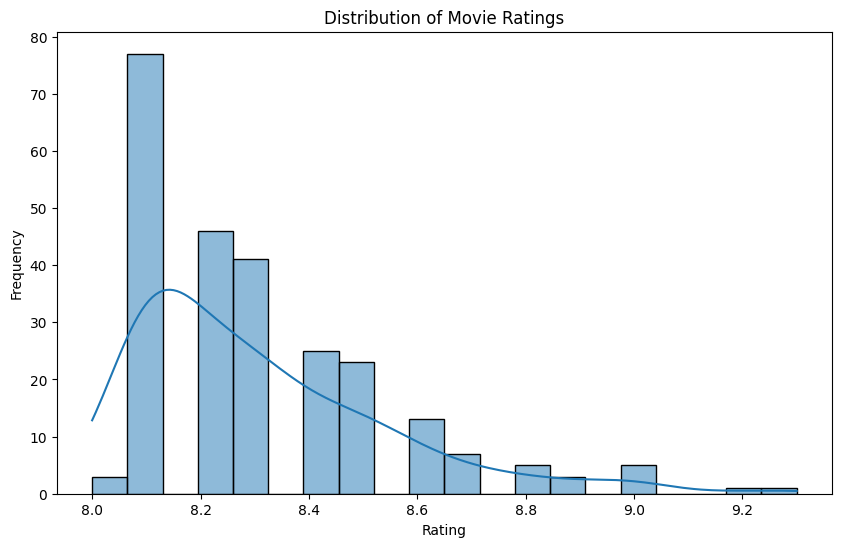

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

2. Распределение жанров

Закомментируйте код в ячейке ниже

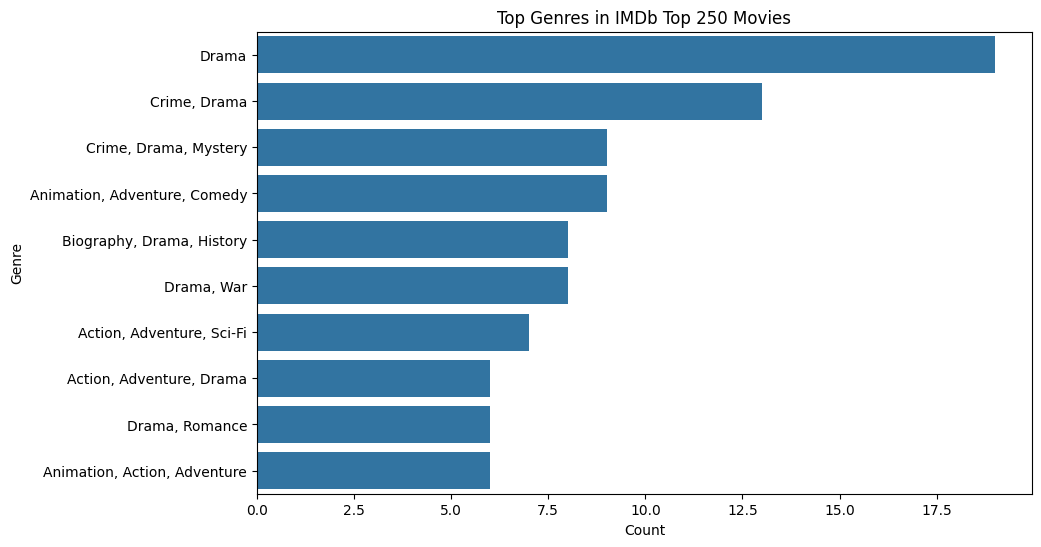

In [120]:
top_genres = df['genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top Genres in IMDb Top 250 Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Сохраните графики и датасет на свой компьютер

Загрузите результат на GitHub

Попробуйте добавить новые метки в датасет или собрать данные другого рейтинга IMDb, другого сайта...